# Gradient Descent
![](2021-12-09-10-14-37.png)
![](2021-12-09-10-15-01.png)

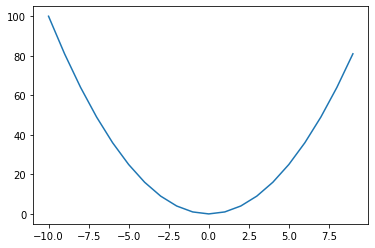

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 기존 함수
x= np.arange(-10,10,1)
f_x = x ** 2
plt.plot(x, f_x)
plt.show()

In [1]:
# 구현
x_new = 10
derivative = []
y = []
learning_rate = 0.1
for i in range(100) :
    old_value = x_new
    derivative.append(old_value - learning_rate * 2 * old_value)
    x_new = old_value - learning_rate * 2 * old_value
    y.append(x_new ** 2)

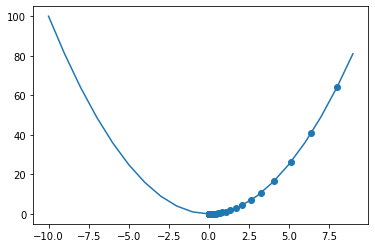

In [5]:
plt.plot(x, f_x)
plt.scatter(derivative, y)
plt.show()

## Learning rate
얼마나 많이 loop을 돌 것인가 ?

너무 작게 설정할 경우 - 끝가지 못감, 시간이 오래 걸림

너무 클 경우 - 데이터가 튀는 문제가 생김, 수렴하지 못하는 경우가 생김

# 굴곡이 많은 함수의 경우
시작점에 따라 다른 최적값을 찾는다.

In [6]:
def sin_function(x):
    return x * np.sin(x ** 2) + 1

def derivitive_f(x):
    return np.sin(x**2) + 2 * (x **2) * np.cos(x ** 2)

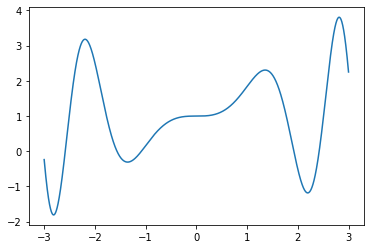

In [7]:
x= np.arange(-3,3,0.001)
f_x = sin_function(x)
plt.plot(x, f_x)
plt.show()

In [8]:
derivitive_f(3)

-15.988226228682427

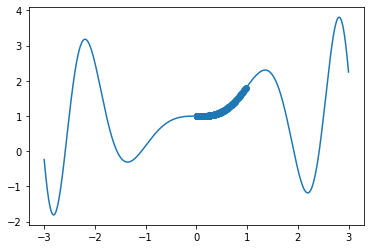

In [12]:
x_new = 1
derivative = []
y = []
learng_rate= 0.01
for i in range(10000):
    old_value = x_new
    x_new = old_value - learng_rate * derivitive_f(old_value)
    derivative.append(x_new)
    y.append(sin_function(x_new))

plt.plot(x, f_x)
plt.scatter(derivative, y)
plt.show()

# Linear regression with GD
![](2021-12-09-10-45-04.png)
![](2021-12-09-10-45-24.png)

# Linear regression with one variable, implemented by numpy

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

## Load Dataset

In [14]:
df = pd.read_csv("data/slr06.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [15]:
raw_X = df["X"].values.reshape(-1, 1)
y = df["Y"].values

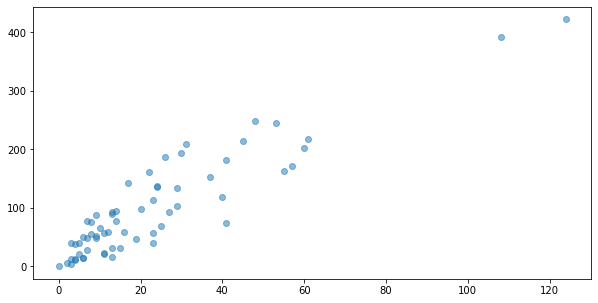

In [16]:
plt.figure(figsize=(10,5))
plt.plot(raw_X,y, 'o', alpha=0.5)

In [17]:
raw_X[:5], y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]], dtype=int64),
 array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [18]:
X = np.concatenate( (np.ones((len(raw_X),1)), raw_X ), axis=1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [20]:
w = np.random.normal((2,1)) 
w

array([1.8686564 , 1.50512408])

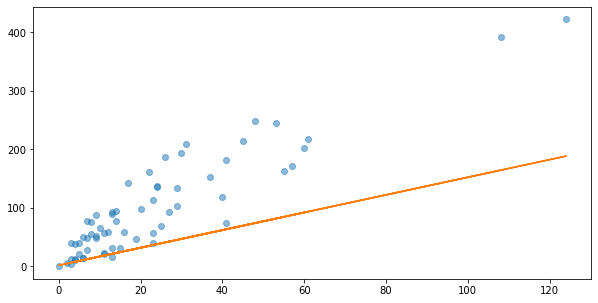

In [21]:
plt.figure(figsize=(10,5))
y_predict = np.dot(X, w)
plt.plot(raw_X,y,"o", alpha=0.5)
plt.plot(raw_X,y_predict)

## HYPOTHESIS AND COST FUNCTION

In [22]:
def hypothesis_function(X, theta):
    return X.dot(theta)

In [23]:
h = hypothesis_function(X,w)

In [24]:
def cost_function(h, y):
    return (1/(2*len(y))) * np.sum((h-y)**2)

In [25]:
h = hypothesis_function(X,w)
cost_function(h, y)

3515.2772578774798

## GRADIENT DESCENT

In [26]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])
        
        if i % 10== 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list

## DO Linear regression with GD

In [27]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta:", theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))

theta: [19.87927602  3.41631121]
cost: 625.3743206253123


In [28]:
theta_list = np.array(theta_list)

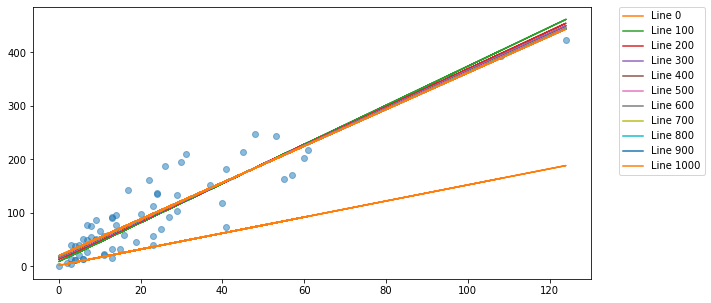

In [29]:
plt.figure(figsize=(10,5))

y_predict_step= np.dot(X, theta_list.transpose())

y_predict_step
plt.plot(raw_X,y,"o", alpha=0.5)
for i in range (0,len(cost_list),100):
    plt.plot(raw_X,y_predict_step[:,i], label='Line %d'%i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

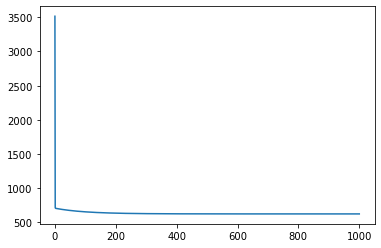

In [30]:
plt.plot(range(len(cost_list)), cost_list);

In [31]:
th0 = theta_list[:,0]
th1 = theta_list[:,1]
TH0, TH1 = np.meshgrid(th0, th1)

In [32]:
Js = np.array([cost_function(y, hypothesis_function(X, [th0, th1])) for th0, th1 in zip(np.ravel(TH0), np.ravel(TH1))])
Js = Js.reshape(TH0.shape)

<a list of 7 text.Text objects>

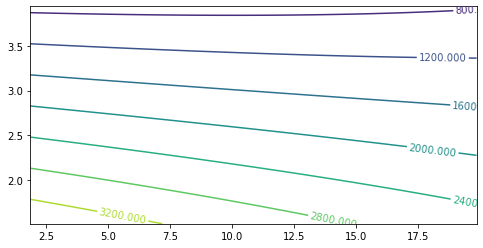

In [33]:
plt.figure(figsize=(8,4))
CS = plt.contour(TH0, TH1, Js)
plt.clabel(CS, inline=True, fontsize=10,inline_spacing=2)

In [34]:
from mpl_toolkits.mplot3d import Axes3D

ms = np.linspace(theta[0] - 15 , theta[0] + 15, 100)
bs = np.linspace(theta[1] - 15 , theta[1] + 15, 100)

M, B = np.meshgrid(ms, bs)

zs = np.array([ cost_function(y, hypothesis_function(X, theta))
    for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

<ipython-input-35-3b909e3cb67a>:5: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 10, color='b', alpha=0.5, offset=0, stride=30)


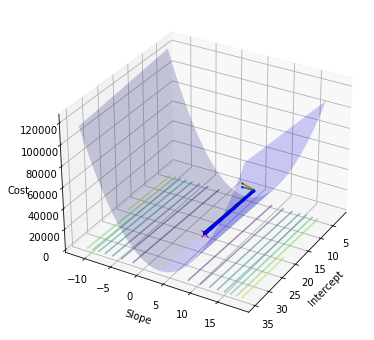

In [35]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 10, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost') 
ax.view_init(elev=30., azim=30)
ax.plot([theta[0]], [theta[1]], [cost_list[-1]] , markerfacecolor='r', markeredgecolor='r', marker='x', markersize=7);

ax.plot(theta_list[:,0], theta_list[:,1], cost_list, markerfacecolor='g', markeredgecolor='g', marker='o', 
                markersize=1);
ax.plot(theta_list[:,0], theta_list[:,1], 0 , markerfacecolor='b', markeredgecolor='b', marker='.', markersize=2);